## Comparison of Air and Seawater Temperatures
At the OOI Coastal Pioneer Offshore Surface Mooring (CP04OSSM)

*Example by Sage Lichtenwalner, 1/11/2019*

For this figure, I requsted data for the instrument CP04OSSM-SBD11-06-METBKA000 using the [OOI Data Portal](https://ooinet.oceanobservatories.org).  If you prefer to do everything in code, you can also request data using the OOI API by following this [quickstart example](https://github.com/ooi-data-review/2018-data-workshops/blob/master/chemistry/examples/quickstart_python.ipynb).

In [1]:
# First, import required libraries
import requests
import os
import re
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns # package for nice plotting defaults
sns.set()

In [2]:
# Specify the THREDDS dataset directory provided in the email 
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage-marine-rutgers/20190111T154505-CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument/catalog.html'

In [3]:
# Now let's find all the data files we need
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
selected_datasets = []
for d in datasets:
    if 'VELPT' in d:
        pass
    else:
        selected_datasets.append(d)

In [4]:
# Open the dataset using xarray
ds = xr.open_mfdataset(selected_datasets)
ds = ds.swap_dims({'obs': 'time'}) # Swap the primary dimension
ds = ds.chunk({'time': 100}) # Used for optimization
ds = ds.sortby('time') # Data from different deployments can overlap so we want to sort all data by timestamp

In [5]:
# Pull the source attribute to use as a plot title
source = ds.source
source

'CP04OSSM-SBD11-06-METBKA000-telemetered-metbk_a_dcl_instrument'

## Time to make a plot

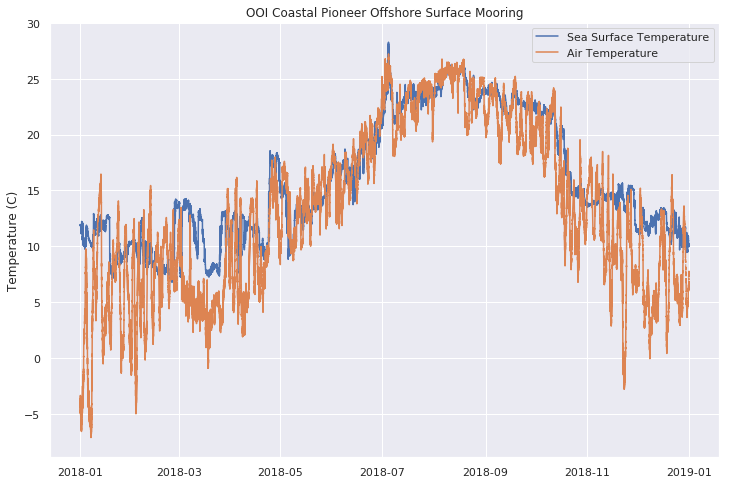

In [6]:
# Finally, let's make a pretty plot of the raw (essentially hourly) data
fig, (ax) = plt.subplots(1,1, figsize=(12,8))
plt.plot(ds['time'],ds['sea_surface_temperature'], label='Sea Surface Temperature')
plt.plot(ds['time'],ds['air_temperature'], label='Air Temperature')
plt.ylabel('Temperature (C)')
plt.title('OOI Coastal Pioneer Offshore Surface Mooring')
plt.legend();

## Monthly Averages
Next we will calculate and plot monthly averages.  You ccould also calculate daily (1D), or weekly (1W), or other averages as well by editing the imput into the resample function.

In [7]:
# Monthly averages
sst_mean = ds['sea_surface_temperature'].resample(time='1MS').mean()
sst_std = ds['sea_surface_temperature'].resample(time='1MS').std()

air_mean = ds['air_temperature'].resample(time='1MS').mean()
air_std = ds['air_temperature'].resample(time='1MS').std()

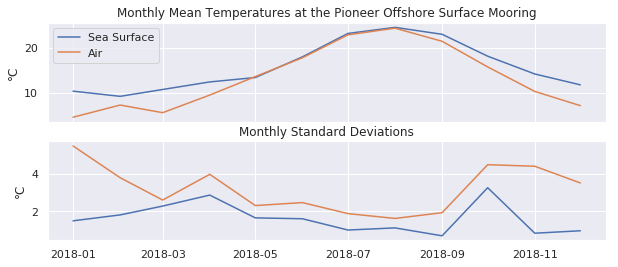

In [8]:
# Plotting time
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,4), sharex=True)

ax1.plot(sst_mean['time'], sst_mean, label='Sea Surface')
ax1.plot(air_mean['time'], air_mean, label='Air')
ax1.set_ylabel('°C')
ax1.set_title('Monthly Mean Temperatures at the Pioneer Offshore Surface Mooring')
ax1.legend();

ax2.plot(sst_std['time'], sst_std, label='Sea Surface')
ax2.plot(air_std['time'], air_std, label='Air')
ax2.set_ylabel('°C')
ax2.set_title('Monthly Standard Deviations');

## Daily Averages

In [9]:
# Monthly averages
sst_mean = ds['sea_surface_temperature'].resample(time='1D').mean()
sst_std = ds['sea_surface_temperature'].resample(time='1D').std()

air_mean = ds['air_temperature'].resample(time='1D').mean()
air_std = ds['air_temperature'].resample(time='1D').std()

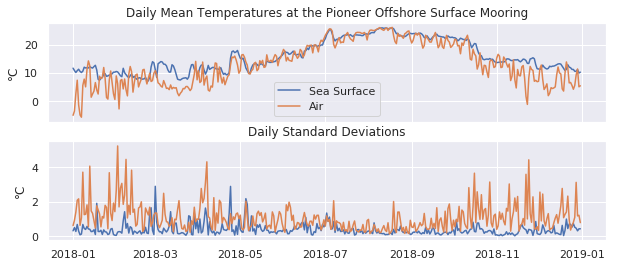

In [10]:
# Plotting time
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,4), sharex=True)

ax1.plot(sst_mean['time'], sst_mean, label='Sea Surface')
ax1.plot(air_mean['time'], air_mean, label='Air')
ax1.set_ylabel('°C')
ax1.set_title('Daily Mean Temperatures at the Pioneer Offshore Surface Mooring')
ax1.legend();

ax2.plot(sst_std['time'], sst_std, label='Sea Surface')
ax2.plot(air_std['time'], air_std, label='Air')
ax2.set_ylabel('°C')
ax2.set_title('Daily Standard Deviations');